<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))
data.head()

Saving final_data.csv to final_data.csv


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
data = data.drop(columns=['player', 'team', 'name'])

In [ ]:
data = data.dropna()

In [ ]:
data = pd.get_dummies(data)

In [ ]:
X = data.drop(columns=['current_value'])
y = data['current_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
mdlDtr = DecisionTreeRegressor(random_state=1)
mdlDtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

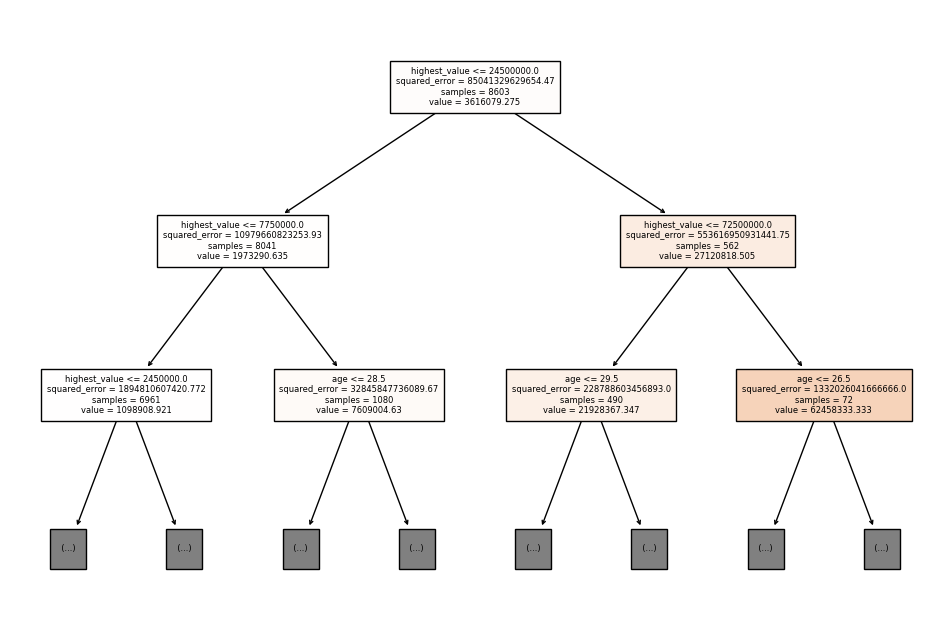

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plot_tree(mdlDtr, max_depth=2, feature_names=X.columns, fontsize=6, filled=True)
plt.show()

In [ ]:
y_test_pred_dtr = mdlDtr.predict(X_test)
mae_dtr = mean_absolute_error(y_test, y_test_pred_dtr)
print(f'Mean Absolute Error (Decision Tree): {mae_dtr}')

Mean Absolute Error (Decision Tree): 1331223.8493723848


In [ ]:
mdlRfr = RandomForestRegressor(random_state=1)
mdlRfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_test_pred_rfr = mdlRfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_test_pred_rfr)
print(f'Mean Absolute Error (Random Forest): {mae_rfr}')

Mean Absolute Error (Random Forest): 1022217.0908879591


In [ ]:
feature_importances = pd.DataFrame(mdlRfr.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                       importance
highest_value                        7.326711e-01
age                                  1.479263e-01
minutes played                       4.076160e-02
appearance                           1.680019e-02
goals                                1.333546e-02
assists                              8.463644e-03
yellow cards                         7.107213e-03
award                                6.495552e-03
height                               5.269226e-03
days_injured                         5.055699e-03
games_injured                        4.913254e-03
second yellow cards                  1.837977e-03
red cards                            1.772977e-03
position_midfield-CentralMidfield    1.456607e-03
winger                               1.137951e-03
position_encoded                     1.098145e-03
position_Defender Centre-Back        5.093153e-04
position_Attack Centre-Forward       4.951929e-04
position_Attack-RightWinger          4.605059e-04
